Very helpful tutorials can be found at this site for [Pytorch tutorials](https://pytorch.org/tutorials/).

In [1]:
import numpy as np
import torch

print(torch.__version__)
import time

import matplotlib.pyplot as plt

1.9.0


# torch.tensor

The `torch` package contains classes and functions that are very similar to `numpy`.  It also provides functions to convert back and forth.

In [2]:
data = [[0.1, 0.2, 0.3], [1.1, 1.2, 1.3], [2.1, 2.2, 2.3]]
data

[[0.1, 0.2, 0.3], [1.1, 1.2, 1.3], [2.1, 2.2, 2.3]]

In [3]:
a = np.array(data)
a

array([[0.1, 0.2, 0.3],
       [1.1, 1.2, 1.3],
       [2.1, 2.2, 2.3]])

In [4]:
type(a), a.dtype

(numpy.ndarray, dtype('float64'))

In [5]:
b = torch.tensor(data)
b

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]])

In [6]:
type(b), b.dtype

(torch.Tensor, torch.float32)

In [7]:
c = torch.from_numpy(a)
c

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]], dtype=torch.float64)

In [8]:
type(c), c.dtype

(torch.Tensor, torch.float64)

In [9]:
d = torch.as_tensor(a)
d

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]], dtype=torch.float64)

In [10]:
type(d), d.dtype

(torch.Tensor, torch.float64)

In [11]:
e = d.numpy()
e

array([[0.1, 0.2, 0.3],
       [1.1, 1.2, 1.3],
       [2.1, 2.2, 2.3]])

In [12]:
type(e), e.dtype

(numpy.ndarray, dtype('float64'))

`torch.tensor` copies the data.  `torch.from_numpy` and `torch.as_tensor` do not copy the data.

In [13]:
a

array([[0.1, 0.2, 0.3],
       [1.1, 1.2, 1.3],
       [2.1, 2.2, 2.3]])

In [14]:
b = torch.from_numpy(a)
b

tensor([[0.1000, 0.2000, 0.3000],
        [1.1000, 1.2000, 1.3000],
        [2.1000, 2.2000, 2.3000]], dtype=torch.float64)

In [15]:
a[0,0] = 42.42
a

array([[42.42,  0.2 ,  0.3 ],
       [ 1.1 ,  1.2 ,  1.3 ],
       [ 2.1 ,  2.2 ,  2.3 ]])

In [16]:
b

tensor([[42.4200,  0.2000,  0.3000],
        [ 1.1000,  1.2000,  1.3000],
        [ 2.1000,  2.2000,  2.3000]], dtype=torch.float64)

In [17]:
b = torch.tensor(a)
b

tensor([[42.4200,  0.2000,  0.3000],
        [ 1.1000,  1.2000,  1.3000],
        [ 2.1000,  2.2000,  2.3000]], dtype=torch.float64)

In [18]:
a[0,0] = 12345.0
a

array([[1.2345e+04, 2.0000e-01, 3.0000e-01],
       [1.1000e+00, 1.2000e+00, 1.3000e+00],
       [2.1000e+00, 2.2000e+00, 2.3000e+00]])

In [19]:
b

tensor([[42.4200,  0.2000,  0.3000],
        [ 1.1000,  1.2000,  1.3000],
        [ 2.1000,  2.2000,  2.3000]], dtype=torch.float64)

We can even use `@` for matrix multiplcation as we do in `numpy`.

In [20]:
a = np.random.uniform(-0.1, 0.1, size=(10, 5))
b = np.random.uniform(-0.1, 0.1, size=(5, 20))
c = a @ b
c.shape

(10, 20)

In [21]:
# torch.rand?

In [22]:
at = (torch.rand(size=(10, 5)) - 0.5) * 0.1
bt = (torch.rand(size=(5, 20)) - 0.5) * 0.1
ct = at @ bt
ct.shape

torch.Size([10, 20])

# Automatic Gradients using autograd

What is the derivative of $\sin(x)$?

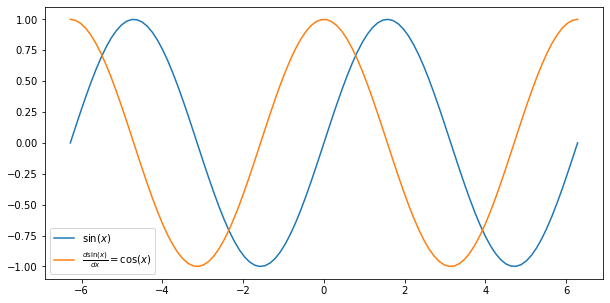

In [23]:
plt.figure(figsize=(10, 5))
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)
dy = np.cos(x)
plt.plot(x, y)
plt.plot(x, dy)
plt.legend(('$\sin(x)$', '$\\frac{d \sin(x)}{dx} = \cos(x)$',));

In [24]:
xt = torch.from_numpy(x)
xt

tensor([-6.2832, -6.1563, -6.0293, -5.9024, -5.7755, -5.6485, -5.5216, -5.3947,
        -5.2677, -5.1408, -5.0139, -4.8869, -4.7600, -4.6331, -4.5061, -4.3792,
        -4.2523, -4.1253, -3.9984, -3.8715, -3.7445, -3.6176, -3.4907, -3.3637,
        -3.2368, -3.1099, -2.9829, -2.8560, -2.7291, -2.6021, -2.4752, -2.3483,
        -2.2213, -2.0944, -1.9675, -1.8405, -1.7136, -1.5867, -1.4597, -1.3328,
        -1.2059, -1.0789, -0.9520, -0.8251, -0.6981, -0.5712, -0.4443, -0.3173,
        -0.1904, -0.0635,  0.0635,  0.1904,  0.3173,  0.4443,  0.5712,  0.6981,
         0.8251,  0.9520,  1.0789,  1.2059,  1.3328,  1.4597,  1.5867,  1.7136,
         1.8405,  1.9675,  2.0944,  2.2213,  2.3483,  2.4752,  2.6021,  2.7291,
         2.8560,  2.9829,  3.1099,  3.2368,  3.3637,  3.4907,  3.6176,  3.7445,
         3.8715,  3.9984,  4.1253,  4.2523,  4.3792,  4.5061,  4.6331,  4.7600,
         4.8869,  5.0139,  5.1408,  5.2677,  5.3947,  5.5216,  5.6485,  5.7755,
         5.9024,  6.0293,  6.1563,  6.28

In [25]:
xt.requires_grad

False

In [26]:
xt.requires_grad_(True)

tensor([-6.2832, -6.1563, -6.0293, -5.9024, -5.7755, -5.6485, -5.5216, -5.3947,
        -5.2677, -5.1408, -5.0139, -4.8869, -4.7600, -4.6331, -4.5061, -4.3792,
        -4.2523, -4.1253, -3.9984, -3.8715, -3.7445, -3.6176, -3.4907, -3.3637,
        -3.2368, -3.1099, -2.9829, -2.8560, -2.7291, -2.6021, -2.4752, -2.3483,
        -2.2213, -2.0944, -1.9675, -1.8405, -1.7136, -1.5867, -1.4597, -1.3328,
        -1.2059, -1.0789, -0.9520, -0.8251, -0.6981, -0.5712, -0.4443, -0.3173,
        -0.1904, -0.0635,  0.0635,  0.1904,  0.3173,  0.4443,  0.5712,  0.6981,
         0.8251,  0.9520,  1.0789,  1.2059,  1.3328,  1.4597,  1.5867,  1.7136,
         1.8405,  1.9675,  2.0944,  2.2213,  2.3483,  2.4752,  2.6021,  2.7291,
         2.8560,  2.9829,  3.1099,  3.2368,  3.3637,  3.4907,  3.6176,  3.7445,
         3.8715,  3.9984,  4.1253,  4.2523,  4.3792,  4.5061,  4.6331,  4.7600,
         4.8869,  5.0139,  5.1408,  5.2677,  5.3947,  5.5216,  5.6485,  5.7755,
         5.9024,  6.0293,  6.1563,  6.28

In [27]:
xt.requires_grad

True

Now we can define our $\sin$ function.

In [28]:
# y = torch.sin(x)
# y

In [29]:
yt = torch.sin(xt)
yt

tensor([ 2.4493e-16,  1.2659e-01,  2.5115e-01,  3.7166e-01,  4.8620e-01,
         5.9291e-01,  6.9008e-01,  7.7615e-01,  8.4973e-01,  9.0963e-01,
         9.5490e-01,  9.8481e-01,  9.9887e-01,  9.9685e-01,  9.7880e-01,
         9.4500e-01,  8.9599e-01,  8.3257e-01,  7.5575e-01,  6.6677e-01,
         5.6706e-01,  4.5823e-01,  3.4202e-01,  2.2031e-01,  9.5056e-02,
        -3.1728e-02, -1.5800e-01, -2.8173e-01, -4.0093e-01, -5.1368e-01,
        -6.1816e-01, -7.1269e-01, -7.9576e-01, -8.6603e-01, -9.2235e-01,
        -9.6384e-01, -9.8982e-01, -9.9987e-01, -9.9384e-01, -9.7181e-01,
        -9.3415e-01, -8.8145e-01, -8.1458e-01, -7.3459e-01, -6.4279e-01,
        -5.4064e-01, -4.2979e-01, -3.1203e-01, -1.8925e-01, -6.3424e-02,
         6.3424e-02,  1.8925e-01,  3.1203e-01,  4.2979e-01,  5.4064e-01,
         6.4279e-01,  7.3459e-01,  8.1458e-01,  8.8145e-01,  9.3415e-01,
         9.7181e-01,  9.9384e-01,  9.9987e-01,  9.8982e-01,  9.6384e-01,
         9.2235e-01,  8.6603e-01,  7.9576e-01,  7.1

In [30]:
xt.shape

torch.Size([100])

In [31]:
yt.backward(torch.ones(100))

In [32]:
xt.grad

tensor([ 1.0000,  0.9920,  0.9679,  0.9284,  0.8738,  0.8053,  0.7237,  0.6306,
         0.5272,  0.4154,  0.2969,  0.1736,  0.0476, -0.0792, -0.2048, -0.3271,
        -0.4441, -0.5539, -0.6549, -0.7453, -0.8237, -0.8888, -0.9397, -0.9754,
        -0.9955, -0.9995, -0.9874, -0.9595, -0.9161, -0.8580, -0.7861, -0.7015,
        -0.6056, -0.5000, -0.3863, -0.2665, -0.1423, -0.0159,  0.1108,  0.2358,
         0.3569,  0.4723,  0.5801,  0.6785,  0.7660,  0.8413,  0.9029,  0.9501,
         0.9819,  0.9980,  0.9980,  0.9819,  0.9501,  0.9029,  0.8413,  0.7660,
         0.6785,  0.5801,  0.4723,  0.3569,  0.2358,  0.1108, -0.0159, -0.1423,
        -0.2665, -0.3863, -0.5000, -0.6056, -0.7015, -0.7861, -0.8580, -0.9161,
        -0.9595, -0.9874, -0.9995, -0.9955, -0.9754, -0.9397, -0.8888, -0.8237,
        -0.7453, -0.6549, -0.5539, -0.4441, -0.3271, -0.2048, -0.0792,  0.0476,
         0.1736,  0.2969,  0.4154,  0.5272,  0.6306,  0.7237,  0.8053,  0.8738,
         0.9284,  0.9679,  0.9920,  1.00

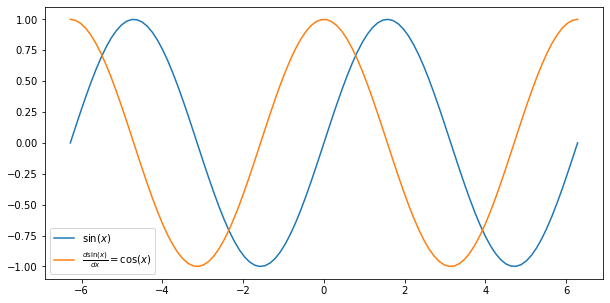

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(xt.detach(), yt.detach())
plt.plot(xt.detach(), xt.grad)
plt.legend(('$\sin(x)$', '$\\frac{d \sin(x)}{dx} = \cos(x)$'));

In [34]:
# yt.backward(torch.ones(100))

In [35]:
yt = torch.sin(xt)
yt.backward(torch.ones(100))
xt.grad

tensor([ 2.0000,  1.9839,  1.9359,  1.8567,  1.7477,  1.6105,  1.4475,  1.2611,
         1.0545,  0.8308,  0.5938,  0.3473,  0.0952, -0.1585, -0.4096, -0.6541,
        -0.8881, -1.1078, -1.3097, -1.4905, -1.6474, -1.7777, -1.8794, -1.9509,
        -1.9909, -1.9990, -1.9749, -1.9190, -1.8322, -1.7160, -1.5721, -1.4029,
        -1.2112, -1.0000, -0.7727, -0.5329, -0.2846, -0.0317,  0.2217,  0.4715,
         0.7138,  0.9445,  1.1601,  1.3570,  1.5321,  1.6825,  1.8059,  1.9001,
         1.9639,  1.9960,  1.9960,  1.9639,  1.9001,  1.8059,  1.6825,  1.5321,
         1.3570,  1.1601,  0.9445,  0.7138,  0.4715,  0.2217, -0.0317, -0.2846,
        -0.5329, -0.7727, -1.0000, -1.2112, -1.4029, -1.5721, -1.7160, -1.8322,
        -1.9190, -1.9749, -1.9990, -1.9909, -1.9509, -1.8794, -1.7777, -1.6474,
        -1.4905, -1.3097, -1.1078, -0.8881, -0.6541, -0.4096, -0.1585,  0.0952,
         0.3473,  0.5938,  0.8308,  1.0545,  1.2611,  1.4475,  1.6105,  1.7477,
         1.8567,  1.9359,  1.9839,  2.00

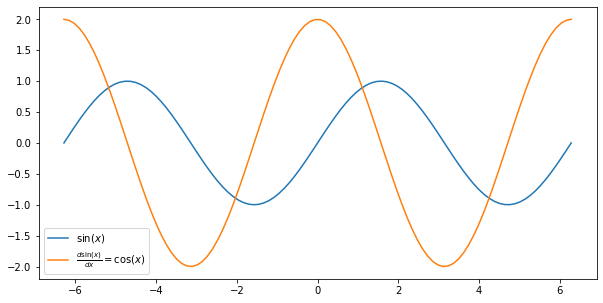

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(xt.detach(), yt.detach())
plt.plot(xt.detach(), xt.grad)
plt.legend(('$\sin(x)$', '$\\frac{d \sin(x)}{dx} = \cos(x)$'));

Above shows the magnitude of our derivative is twice what is should be.  This is because `backward` adds the gradient values to the previous values.  We must explicitly zero out the gradient first.

In [37]:
xt.grad.zero_()
for i in range(10):
    yt = torch.sin(xt)
    yt.backward(torch.ones(100))
    print(xt.grad[0])

tensor(1., dtype=torch.float64)
tensor(2., dtype=torch.float64)
tensor(3., dtype=torch.float64)
tensor(4., dtype=torch.float64)
tensor(5., dtype=torch.float64)
tensor(6., dtype=torch.float64)
tensor(7., dtype=torch.float64)
tensor(8., dtype=torch.float64)
tensor(9., dtype=torch.float64)
tensor(10., dtype=torch.float64)


In [38]:
for i in range(10):
    xt.grad.zero_()
    yt = torch.sin(xt)
    yt.backward(torch.ones(100))
    print(xt.grad[0])

tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)


# Train linear model of one variable using SGD in Pytorch

## First in `numpy`.

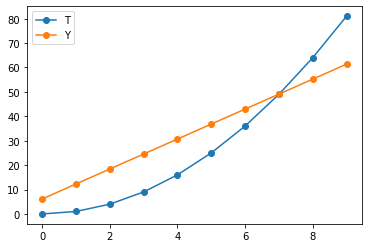

In [39]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2

n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

W = np.zeros((2, 1))

for epoch in range(100):
    
    Y = X @ W[1:, :] + W[0:1, :]
    
    mse = ((T - Y) ** 2).mean()  # not used
    
    gradient = - X.T @ (T - Y)
    W -= learning_rate * gradient

plt.plot(X, T, 'o-', label='T')
plt.plot(X, Y, 'o-', label='Y')
plt.legend();

## Now in `torch`.

In [40]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X)
T = torch.from_numpy(T)

W = torch.zeros((2, 1))

for epoch in range(100):
    
    Y = X @ W[1:, :] + W[0:1, :]
    
    mse = ((T - Y) ** 2).mean()  # not used
    
    gradient = - X.T @ (T - Y)
    W -= learning_rate * gradient

plt.plot(X, T, 'o-', label='T')
plt.plot(X, Y, 'o-', label='Y')
plt.legend();

RuntimeError: expected scalar type Long but found Float

In [41]:
X.dtype

torch.int64

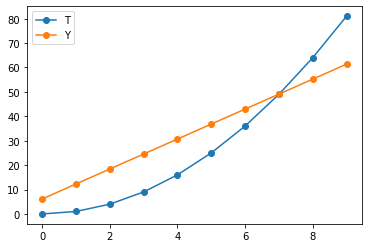

In [42]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()  ## ADDED .float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1))

for epoch in range(100):
    
    Y = X @ W[1:, :] + W[0:1, :]
    
    mse = ((T - Y) ** 2).mean()  # not used
        
    gradient = - X.T @ (T - Y)
    W -= learning_rate * gradient

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

So why are we using `torch`?  Looks just like our `numpy` code?

## Let's take advantage of `autograd`!!

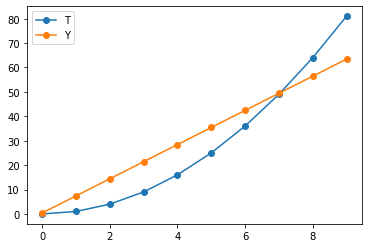

In [43]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1), requires_grad=True)

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]
    
    mse = ((T - Y)**2).mean()
    
    mse.backward()  ##  NEW
    
    with torch.no_grad():  ## NEW
        W -= learning_rate * W.grad
        W.grad.zero_()

plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

## Using Predefined Optimizers

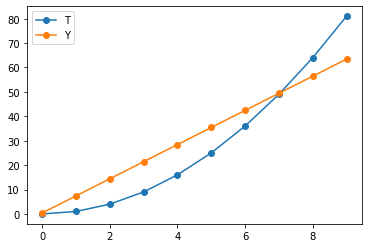

In [44]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1), requires_grad=True)

optimizer = torch.optim.SGD([W], lr=learning_rate)   ## NEW

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]
    
    mse = ((T - Y)**2).mean()
    mse.backward()
    
    optimizer.step()        ## NEW
    optimizer.zero_grad()   ## NEW
    
plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

In [45]:
# torch.optim.

## Using Predefined Loss Functions

In [48]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T)

W = torch.zeros((2, 1), requires_grad=True)

optimizer = torch.optim.SGD([W], lr=learning_rate)

mse_func = torch.nn.MSELoss()  ## NEW

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]
    
    mse = mse_func(T, Y)    ## NEW
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()
    
plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

RuntimeError: Found dtype Long but expected Float

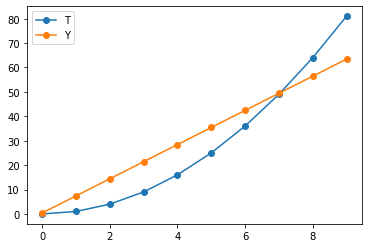

In [50]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples = X.shape[0]
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()   # JUST ADDED THIS

W = torch.zeros((2, 1), requires_grad=True)

optimizer = torch.optim.SGD([W], lr=learning_rate)

mse_func = torch.nn.MSELoss()  ## NEW

for epoch in range(100):

    Y = X @ W[1:, :] + W[0:1, :]
    
    mse = mse_func(T, Y)    ## NEW
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()
    
plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

## Using torch.nn module

The `torch` module includes classes that simplify the constuction of our models.  It will not look simpler for our linear model, but will for multilayered models.

In [51]:
n_inputs = 1
n_outputs = 1

model = torch.nn.Sequential(torch.nn.Linear(n_inputs, n_outputs))
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2606]], requires_grad=True),
 Parameter containing:
 tensor([-0.7839], requires_grad=True)]

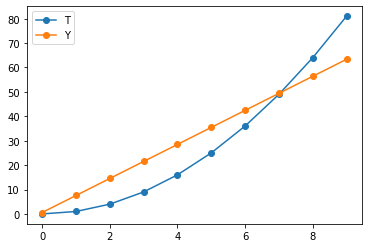

In [54]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape  ## NEW, added n_inputs
n_outputs = T.shape[1]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(torch.nn.Linear(n_inputs, n_outputs))

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

for epoch in range(100):

    Y = model(X)            ## NEW
    
    mse = mse_func(T, Y)
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()
    
plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

Now, add a hidden layer, or two.

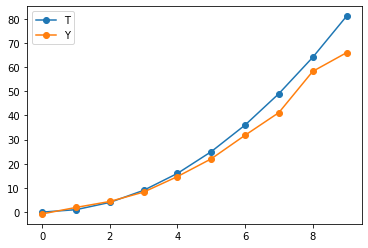

In [55]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape  ## NEW, added n_inputs
n_outputs = T.shape[1]
n_hiddens = [10, 10]

learning_rate = 0.01 / (n_samples * n_outputs)

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

for epoch in range(1000):

    Y = model(X)            ## NEW
    
    mse = mse_func(T, Y)
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()
    
plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

Maybe Adam will do better.

In [147]:
# torch.optim.Adam?
# torch.nn.Linear?

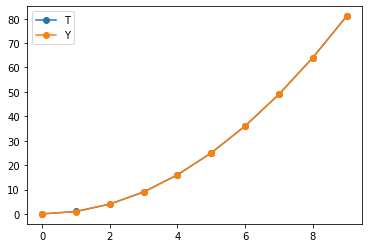

In [56]:
X = np.arange(10).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape
n_outputs = T.shape[1]
n_hiddens = [10, 10]

learning_rate = 0.5 / (n_samples * n_outputs)  ## Larger learning rate

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

for epoch in range(1000):

    Y = model(X)
    
    mse = mse_func(T, Y)
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()
    
plt.plot(X.detach(), T, 'o-', label='T')
plt.plot(X.detach(), Y.detach(), 'o-', label='Y')
plt.legend();

# Now for some Speed with a GPU

It is trivial to move data and operations down to a GPU with pytorch.

In [57]:
import time

n = 1000
a = np.random.uniform(-0.1, 0.1, size=(n, n)).astype(np.float32)
b = np.random.uniform(-0.1, 0.1, size=(n, n)).astype(np.float32)

start_time = time.time()
for i in range(1000):
    c = a @ b
elapsed_time = time.time() - start_time

print(f'Took {elapsed_time} seconds')
c.shape

Took 5.134020805358887 seconds


(1000, 1000)

In [58]:
torch.cuda.is_available()

True

In [59]:
n = 1000
at = (torch.rand(size=(n, n)) - 0.5) * 0.2
bt = (torch.rand(size=(n, n)) - 0.5) * 0.2

# ct = torch.zeros((n, n))

start_time = time.time()
at = at.to('cuda')  ## Don't forget these assignments.  at.to('cuda') does not change at
bt = bt.to('cuda')

start_time = time.time()

for i in range(10000):
    ct = at @ bt

ct = ct.to('cpu')
elapsed_time = time.time() - start_time

print(f'Took {elapsed_time} seconds')
ct.shape

Took 2.518690586090088 seconds


torch.Size([1000, 1000])

In [152]:
import subprocess

def use_gpu(use=True):
    if use:
        subprocess.run(['system76-power', 'graphics', 'power', 'on'])
        subprocess.run(['sudo', 'modprobe', 'nvidia'])
    else:
        subprocess.run(['sudo', 'rmmod', 'nvidia'])
        subprocess.run(['system76-power', 'graphics', 'off'])
        
# use_gpu()  #  if running on my system76 laptop

torch.cuda.is_available()

True

Now let's compare speed of our `torch.nn` model on more data, without and with the GPU.

Training took 9.45 seconds.


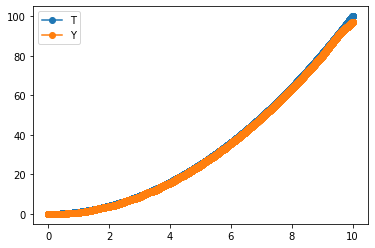

In [153]:
use_gpu = False

n_samples = 10000
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape 
n_outputs = T.shape[1]

n_hiddens = [100, 100]

learning_rate = 0.1 #  / (n_samples * n_outputs)  ## Larger learning rate

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

if use_gpu:
    print('Moving data and model to GPU')
    X = X.to('cuda')
    T = T.to('cuda')
    model.to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

start_time = time.time()

for epoch in range(1000):

    Y = model(X)
    
    mse = mse_func(T, Y)
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time:.2f} seconds.')
if use_gpu:
    print('   with GPU')
    
plt.plot(X.cpu().detach(), T.cpu(), 'o-', label='T')
plt.plot(X.cpu().detach(), Y.cpu().detach(), 'o-', label='Y')
plt.legend();

Moving data and model to GPU
Training took 2.52 seconds.
   with GPU


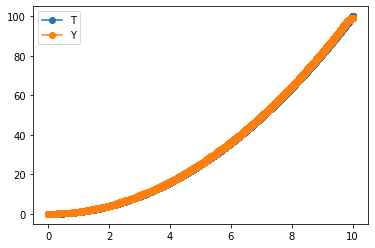

In [154]:
use_gpu = True

n_samples = 10000
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape 
n_outputs = T.shape[1]

n_hiddens = [100, 100]

learning_rate = 0.1 #  / (n_samples * n_outputs)  ## Larger learning rate

X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

model = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens[0]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[0], n_hiddens[1]),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens[1], n_outputs))

if use_gpu:
    print('Moving data and model to GPU')
    X = X.to('cuda')
    T = T.to('cuda')
    model.to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

start_time = time.time()

for epoch in range(1000):

    Y = model(X) 
    
    mse = mse_func(T, Y)
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time:.2f} seconds.')
if use_gpu:
    print('   with GPU')
    
plt.plot(X.cpu().detach(), T.cpu(), 'o-', label='T')
plt.plot(X.cpu().detach(), Y.cpu().detach(), 'o-', label='Y')
plt.legend();

# The torch.nn.Module.forward function

We just saw how to implement the neural network using `torch.nn.Sequential` as a combination of `Linear` and `Tanh` layers.  The forward calculation for such a neural network is implicitly defined this way.  

Alternatively, we can define a new class that extends `torch.nn.Module` and define the `forward` function explicitly.

Moving data and model to GPU
Training took 2.71 seconds.
   with GPU


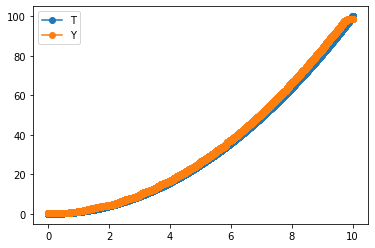

In [3]:
use_gpu = True

n_samples = 10000
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = X ** 2
n_samples, n_inputs = X.shape 
n_outputs = T.shape[1]


X = torch.from_numpy(X).float()
T = torch.from_numpy(T).float()

class NNet(torch.nn.Module):
    
    def __init__(self, n_inputs, n_hiddens_list, n_outputs):
        super().__init__()  # call parent class (torch.nn.Module) constructor
            
        self.hidden_layers = torch.nn.ModuleList()  # necessary for model.to('cuda')
        for nh in n_hiddens_list:
            self.hidden_layers.append( torch.nn.Sequential(
                torch.nn.Linear(n_inputs, nh),
                torch.nn.Tanh()))
            
            n_inputs = nh
        self.output_layer = torch.nn.Linear(n_inputs, n_outputs)
            
    def forward(self, X):
        Y = X
        for hidden_layer in self.hidden_layers:
            Y = hidden_layer(Y)
        Y = self.output_layer(Y)
        return Y

n_hiddens = [100, 100]

learning_rate = 0.1 #  / (n_samples * n_outputs)  ## Larger learning rate

model = NNet(n_inputs, n_hiddens, n_outputs)

if use_gpu:
    print('Moving data and model to GPU')
    X = X.to('cuda')
    T = T.to('cuda')
    model.to('cuda')   # or   model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
mse_func = torch.nn.MSELoss()

start_time = time.time()

for epoch in range(1000):

    Y = model(X) 
    
    mse = mse_func(T, Y)
    mse.backward()
    
    optimizer.step() 
    optimizer.zero_grad()

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time:.2f} seconds.')
if use_gpu:
    print('   with GPU')
    
plt.plot(X.cpu().detach(), T.cpu(), 'o-', label='T')
plt.plot(X.cpu().detach(), Y.cpu().detach(), 'o-', label='Y')
plt.legend();
